Import all the libraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tricker
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab as pl
from sklearn import metrics

Upload and read the information of the input file

In [64]:
file = pd.read_csv('CC.csv')

#file.head(10)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

File desription

In [65]:
file.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Check for NULL values (for each category)

In [66]:
filenulls = pd.DataFrame(file.isnull().sum().sort_values(ascending=False))
filenulls.columns = ['Nulls: ']
filenulls.index.name = 'Features'
print(filenulls)

                                  Nulls: 
Features                                 
MINIMUM_PAYMENTS                      313
CREDIT_LIMIT                            1
TENURE                                  0
PURCHASES_FREQUENCY                     0
BALANCE                                 0
BALANCE_FREQUENCY                       0
PURCHASES                               0
ONEOFF_PURCHASES                        0
INSTALLMENTS_PURCHASES                  0
CASH_ADVANCE                            0
ONEOFF_PURCHASES_FREQUENCY              0
PRC_FULL_PAYMENT                        0
PURCHASES_INSTALLMENTS_FREQUENCY        0
CASH_ADVANCE_FREQUENCY                  0
CASH_ADVANCE_TRX                        0
PURCHASES_TRX                           0
PAYMENTS                                0
CUST_ID                                 0


Finding the mean values 

In [67]:
file.mean()

BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

Fill the nulls using the mean value of each category

In [68]:
file = file.fillna(file.mean())

Check if nulls had been filled properly

In [85]:
file.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Check the nulls again after we filled. All nulls should be 0

In [69]:
filenulls = pd.DataFrame(file.isnull().sum().sort_values(ascending=False))
filenulls.columns = ['Nulls: ']
filenulls.index.name = 'Features'
print(filenulls)

                                  Nulls: 
Features                                 
TENURE                                  0
PRC_FULL_PAYMENT                        0
BALANCE                                 0
BALANCE_FREQUENCY                       0
PURCHASES                               0
ONEOFF_PURCHASES                        0
INSTALLMENTS_PURCHASES                  0
CASH_ADVANCE                            0
PURCHASES_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY        0
CASH_ADVANCE_FREQUENCY                  0
CASH_ADVANCE_TRX                        0
PURCHASES_TRX                           0
CREDIT_LIMIT                            0
PAYMENTS                                0
MINIMUM_PAYMENTS                        0
CUST_ID                                 0


Creating the training model


> Using the elbow method, train the model based on the best clusters



In [70]:
# categorize the features
x = file[['BALANCE' , 'TENURE']].iloc[: , :].values

# create a list to keep track of the each line shape thats used in the method
somelist = []

# train the model
# range(0,10) gives float infinity to integer error
for i in range(1,11):
  # create the model
  model = KMeans(n_clusters=i, random_state=0)
  
  # fit the model to dataset
  model.fit(x)

  # append the clusters accordingly
  somelist.append(model.inertia_)

Visualization of the modelling result

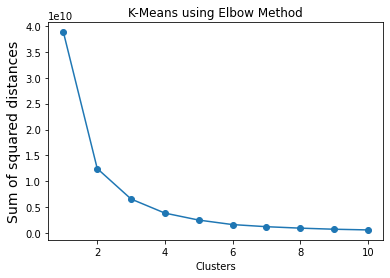

In [71]:
plt.title('K-Means using Elbow Method')
plt.plot(range(1, 11), somelist, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distances', fontsize = 14)
plt.show()

What does this result mean?

> We can see that K=2 is the best number of clusters. So we can train our model using 2 clusters to catergorize the groups. 



In [72]:
# creating a new model with 2 clusters
newmodel = KMeans(n_clusters=2,init='k-means++')

# train the model
newmodel.fit(x)

# prediction the function with our new model
yprediction = newmodel.predict(x)

# finding the L2 score of the model
score = metrics.silhouette_score(x, yprediction)
print('Score: ', score)

Score:  0.7403025787638986


More visualizations

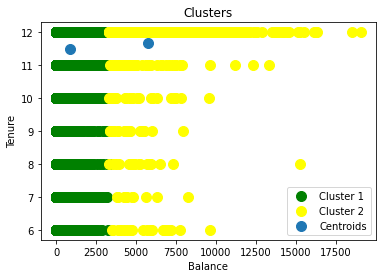

In [73]:
## Using a scatter plot

plt.figure()

plt.scatter(x[yprediction == 0, 0], x[yprediction == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(x[yprediction == 1, 0], x[yprediction == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')

# show the centroid of each application group in the figure
plt.scatter(newmodel.cluster_centers_[:, 0], newmodel.cluster_centers_[:, 1], s = 100, label = 'Centroids')

# To create labels and title for our figure
plt.title('Clusters')
plt.xlabel('Balance')
plt.ylabel('Tenure')
plt.legend()
plt.show()

Fitting dataframe to standard scale

In [74]:
scale = file.iloc[:,1:]

standardscaler = StandardScaler()

standardscaler.fit(scale)
scale = standardscaler.transform(scale)
pca = PCA(2)
filepca = pca.fit_transform(scale)

df = pd.DataFrame(data=filepca)
finaldf = pd.concat([df,file[['BALANCE','TENURE']]],axis=1)
print(finaldf)

             0         1      BALANCE  TENURE
0    -1.682220 -1.076446    40.900749      12
1    -1.138295  2.506480  3202.467416      12
2     0.969678 -0.383572  2495.148862      12
3    -0.873623  0.043207  1666.670542      12
4    -1.599435 -0.688589   817.714335      12
...        ...       ...          ...     ...
8945 -0.359628 -2.016134    28.493517       6
8946 -0.564366 -1.639096    19.183215       6
8947 -0.926202 -1.810773    23.398673       6
8948 -2.336551 -0.657965    13.457564       6
8949 -0.556426 -0.400507   372.708075       6

[8950 rows x 4 columns]


Final dataframe info

In [75]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        8950 non-null   float64
 1   1        8950 non-null   float64
 2   BALANCE  8950 non-null   float64
 3   TENURE   8950 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 279.8 KB


Check for the null values in the final dataframe file

In [76]:
finalnull = pd.DataFrame(finaldf.isnull().sum().sort_values(ascending=False))
finalnull.columns = ['Null']
finalnull.index.name = 'Features'
print(finalnull)

          Null
Features      
TENURE       0
BALANCE      0
1            0
0            0


Print the final mean of the dataframe

In [77]:
finaldf.mean()

0         -4.630064e-16
1         -1.582967e-16
BALANCE    1.564475e+03
TENURE     1.151732e+01
dtype: float64

Fill the null values, if there are any

In [78]:
finaldf = finaldf.fillna(finaldf.mean())

Print the final dataframe data info

In [79]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        8950 non-null   float64
 1   1        8950 non-null   float64
 2   BALANCE  8950 non-null   float64
 3   TENURE   8950 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 279.8 KB


Make another elbow model and print the score

In [80]:
finalmodel = KMeans(n_clusters=2,init='k-means++')

# training our model with cluster size 2
finalmodel.fit(finaldf)

# predicting and evaluating the model score
yfinalprediction = finalmodel.predict(finaldf)


finalmodelscore = metrics.silhouette_score(finaldf, yfinalprediction)
print('Score: ', finalmodelscore)

Score:  0.7402976080556245


Fit the data to the model

In [81]:
finalx = finaldf[['BALANCE' , 'TENURE']].iloc[: , :].values

# keep track of the shapes used while implementing elbow method

finallist = []

# train the model 
for i in range(1, 11):
    
    # create a new model object
    model = KMeans(n_clusters=i, random_state=0)

    # fit according to the data
    model.fit(finalx)

    # append each one to the list created above
    finallist.append(model.inertia_)

Visualize the final model

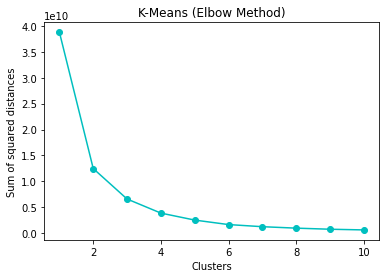

In [82]:
plt.title('K-Means (Elbow Method)')
plt.plot(range(1, 11), finallist, 'c', marker='o')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distances')
plt.show()

Result of final elbow method

In [83]:
finalmodel2 = KMeans(n_clusters=2,init='k-means++')

# training our model with cluster size 2
finalmodel2.fit(finalx)

# predicting and evaluating the model score
yfinalprediction2 = finalmodel2.predict(finalx)

finalmodelscore2 = metrics.silhouette_score(finalx, yfinalprediction2)
print('Score: ', finalmodelscore2)

Score:  0.7403025787638986


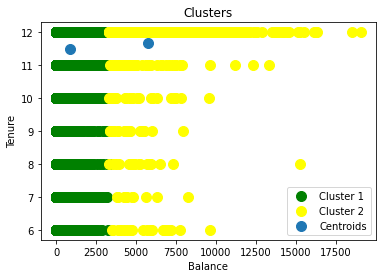

In [84]:
plt.figure()

plt.scatter(finalx[yfinalprediction2 == 0, 0], finalx[yfinalprediction2 == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(finalx[yfinalprediction2 == 1, 0], finalx[yfinalprediction2 == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')

#o show the centroid of each application group in the figure
plt.scatter(finalmodel2.cluster_centers_[:, 0], finalmodel2.cluster_centers_[:, 1], s = 100, label = 'Centroids')

# To create labels and title for our figure
plt.title('Clusters')
plt.xlabel('Balance')
plt.ylabel('Tenure')
plt.legend()
plt.show()